### Unsupervised Learning:

* There won't be any supervison on the model.
* we provide input only .
* There are two methods in unsupervised learning.
    * Clustering --- grouping 
        * k-means clustering
    * Associative -- combine more clusters.
    

### K- means clustering:

* This is one of the clustering algorithm ,which works distance between two points.
* k is the number of clusters to be formed.
* K values should be higher for better results.

#### Steps involved in K-means clustering:

* select the k value.
    * elbow method
        * Will find the distance of each point and draw the graph.
        * From the graph we will take the point where the slope was fallen.That is taken as k value.
    * sillhoutee method
        * This use elbow method and also finds the coefficient.
        * Forming the centroids
* Select the groups and finding the average.

## k-means Clustering:

<img src = "https://editor.analyticsvidhya.com/uploads/56854k%20means%20clustering.png">


### How does K-means clustering algorithm work?

<img src = "https://editor.analyticsvidhya.com/uploads/34513k%20means.png">





### Euclidean Distance:

<img src = "https://editor.analyticsvidhya.com/uploads/96840RtnTY.jpg">



### Elbow method:
<img src = "https://editor.analyticsvidhya.com/uploads/39510Beyond_the_k-Means_5.png">

### Elbow curve:

<img src = "https://editor.analyticsvidhya.com/uploads/40205elbow.png">



### Silhoutee method:

s(i) = b(i) - a(i)/larger of b(i) and a(i)


In [2]:
## importing the libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
### loading the dataset:

data = pd.read_csv("https://raw.githubusercontent.com/AP-Skill-Development-Corporation/Tirumala-ML/main/Day-11/Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
### assigning the input values :

X = data.iloc[:,[3,4]].values

In [12]:
### importing the kmeans algorithm:

from sklearn.cluster import KMeans

### finfing the k-values using elbow method.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.83934915659,
 21850.165282585633,
 19672.07284901432]

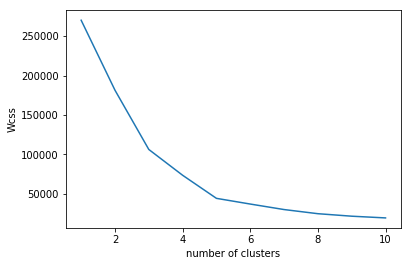

In [14]:
plt.plot(range(1,11),wcss)
plt.xlabel("number of clusters")
plt.ylabel("Wcss")
plt.show()

In [15]:
### from the graph we can observe the slope of the line is at the point 5.So k = 5.

kmeans = KMeans(n_clusters = 5,init = "k-means++",random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [16]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

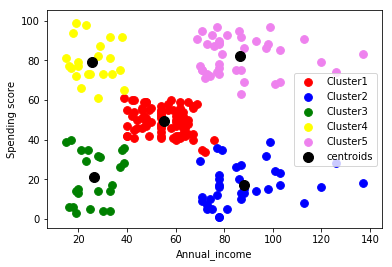

In [19]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s = 60 , c = 'red',label = 'Cluster1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s = 60 , c = 'blue',label = 'Cluster2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s = 60 , c = 'green',label = 'Cluster3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s = 60 , c = 'yellow',label = 'Cluster4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s = 60 , c = 'violet',label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c = 'black',label = "centroids")
plt.xlabel('Annual_income')
plt.ylabel("Spending score")
plt.legend()
plt.show()